# Sepsis Survival Minimal Clinical Records
#### Identifying high-risk patients with sepsis who may have low survival outcomes (predicting if a patient will die or live)

According to the CDC, sepsis is the leading cause of death in hospitalized patients in the US. In Norway, which is where the dataset is from, it is the leading cause of death from infection. Sepsis occurs when an infection in the body reaches the blood and the immune system has an extreme reaction. This reaction can be life-threatening and impacts the entire body as it spreads. It is important to catch the symptoms as early as possible and treat them immediately to increase the likelihood of saving the patient’s life. We are looking at sepsis cases in Norway and how sepsis-related hospitalizations contribute to overall hospital mortality.



---



Sepsis is a critical condition with high mortality rates, particularly in hospitalized patients. Early prediction of survival outcomes in sepsis cases can empower healthcare providers to take proactive steps, such as allocating resources, prioritizing care, and closely monitoring high-risk
patients. This model aims to improve patient care by supporting timely decision-making in sepsis management by identifying those at greater risk of death from sepsis. This would help inform decisions such as resource allocations, timely intervention, and enhanced vital monitoring of such patients.

# Data Source and Description
### Dataset

[Epidemiology and impact on all-cause mortality of sepsis in Norwegian hospitals: A national retrospective study](https://plos.figshare.com/articles/dataset/Epidemiology_and_impact_on_all-cause_mortality_of_sepsis_in_Norwegian_hospitals_A_national_retrospective_study/5613424?file=9774559)

The dataset has 5 main variables: Age (years), Sex (0 male, 1 female),
Length of Stay (days), Hospital Outcome (0 alive, 1 dead), and Episode Number. The dataset
also has 9 ICD (International Classification of Disease) codes. We have 110,204 data points.
There are some missing values, but they apply to the ICD codes, which most likely means that
the patient did not have that particular disease when they were admitted to the hospital.


Other source: [UCI Repository Data Source](https://archive.ics.uci.edu/dataset/827/sepsis+survival+minimal+clinical+records)



The dataset consists of 110,204 admissions of 84,811 hospitalized subjects between 2011 and 2012 in Norway who were diagnosed with infections, systemic inflammatory response syndrome, sepsis by causative microbes, or septic shock.


***The prediction task is to determine whether a patient survived or is deceased at a time of about 9 days after collecting their medical record at the hospital.

### Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, make_scorer


### Loading the Dataset

In [ ]:
# mounting the drive

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#changing the directory
%cd '/content/drive/Shareddrives/USC - PROJECTS/Healthcare Analytics/Healthcare Final Project'

!ls

/content/drive/.shortcut-targets-by-id/1m6KJ5MptESrmiWNPs-pBTEotD8SgVjL7/Healthcare Final Project
'Copy of sespsis_survival (1).ipynb'	'S1 Dataset.xlsx'
'Copy of sespsis_survival.ipynb'	'S1 Table.docx'
'DSO 568 - Final Project Report .gdoc'	 sepsis.py
'Final Project'				'Sepsis Survival Prediction Model - DSO 568 .gslides'
'Final Project Instructions.pdf'	 sespsis_survival.ipynb
'NN- sespsis_survival.ipynb'


In [ ]:
#reading in the dataset

sepsis = pd.read_excel('S1 Dataset.xlsx')
sepsis.head()

,Age (years),"Sex (0 male, 1 female)",Length of stay (days),"Hospital outcome (0 alive, 1 dead)",Episode number,ICD-10 1,ICD-10 2,ICD-10 3,ICD-10 4,ICD-10 5,ICD-10 6,ICD-10 7,ICD-10 8,ICD-10 9
0,21,1,1,0,1,,J159,,,,,,,
1,20,1,5,0,1,J158,,,,,,,,
2,21,1,3,0,1,J157,E86,,,,,,,
3,77,0,18,0,1,,J159,,,,,,,
4,72,0,9,0,1,A415,I509,A418,K810,,,,,


# Exploratory Data Analysis


In [ ]:
sepsis.describe()

,Age (years),"Sex (0 male, 1 female)",Length of stay (days),"Hospital outcome (0 alive, 1 dead)",Episode number
count,110204.000000,110204.000000,110204.000000,110204.000000,110204.000000
mean,62.735255,0.473948,9.351348,0.073545,1.349379
std,24.126806,0.499323,12.789597,0.261031,0.751799
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,51.000000,0.000000,3.000000,0.000000,1.000000
50%,68.000000,0.000000,6.000000,0.000000,1.000000
75%,81.000000,1.000000,11.000000,0.000000,1.000000
max,100.000000,1.000000,499.000000,1.000000,5.000000


From the summary statistics above, it is seen that the average age is 63 years, average length of stay about 9 days and averge episodes of sepsis is 1. The numerical variables in the dataset are of different scales. Therefore it is important to scale them to prevent biases in the model.

In [ ]:
# renaming columns
sepsis = sepsis.rename( columns = {
    'Age (years)' : 'Age',
    'Sex (0 male, 1 female)' : 'Sex',
    'Length of stay (days)' : 'Length_of_stay',
    'Hospital outcome (0 alive, 1 dead)' : 'Hospital_Outcome',
    'Episode number' : 'Episode_number'
})

In [ ]:
#check for nan values:
sepsis.isnull().sum().sum()

18

In [ ]:
#breakdown to see the columns with the missing values

sepsis.isna().sum()

,0
Age,0
Sex,0
Length_of_stay,0
Hospital_Outcome,0
Episode_number,0
ICD-10 1,8
ICD-10 2,5
ICD-10 3,3
ICD-10 4,1
ICD-10 5,1


Examing the datasets to heck the blank rows.

In [ ]:
#explore what icd10-1 column has nan
#filter rows where "ICD-10 1" is null
null_icd101_rows = sepsis[sepsis['ICD-10 1'].isnull()]

null_icd101_rows

,Age,Sex,Length_of_stay,Hospital_Outcome,Episode_number,ICD-10 1,ICD-10 2,ICD-10 3,ICD-10 4,ICD-10 5,ICD-10 6,ICD-10 7,ICD-10 8,ICD-10 9
8,69,0,7,0,1,NaN,,,,,,,,
66,47,1,5,0,1,NaN,J36,,,,,,,
935,95,1,2,0,1,NaN,J159,,,,,,,
1032,76,0,18,0,1,NaN,,,,,,,,
1357,36,1,3,0,1,NaN,,,,,,,,
3495,72,0,22,0,1,NaN,D696,N170,,,,,,
45630,36,0,8,0,1,NaN,,,,,,,,
73444,66,1,5,0,1,NaN,E86,,,,,,,


In [ ]:
#explore blank icd10-1 rows
blank_icd101 = sepsis[sepsis['ICD-10 1'] == ' ']
print('Blank observations in column ICD-10 1:', len(blank_icd101))

Blank observations in column ICD-10 1: 31068


In [ ]:
blank_icd101.head(5)

,Age,Sex,Length_of_stay,Hospital_Outcome,Episode_number,ICD-10 1,ICD-10 2,ICD-10 3,ICD-10 4,ICD-10 5,ICD-10 6,ICD-10 7,ICD-10 8,ICD-10 9
0,21,1,1,0,1,,J159,,,,,,,
3,77,0,18,0,1,,J159,,,,,,,
6,74,0,28,0,1,,K81,,,,,,,
10,72,1,2,0,1,,J159,,,,,,,
16,72,0,17,1,1,,J159,,,,,,,


In [ ]:
#explore non blank icd10-1 rows
noblank_icd101 = sepsis[sepsis['ICD-10 1'] != ' ']
print('Non-blank observations in column ICD-10 1:', len(noblank_icd101))

Non-blank observations in column ICD-10 1: 79136


In [ ]:
noblank_icd101.head(5)

,Age,Sex,Length_of_stay,Hospital_Outcome,Episode_number,ICD-10 1,ICD-10 2,ICD-10 3,ICD-10 4,ICD-10 5,ICD-10 6,ICD-10 7,ICD-10 8,ICD-10 9
1,20,1,5,0,1,J158,,,,,,,,
2,21,1,3,0,1,J157,E86,,,,,,,
4,72,0,9,0,1,A415,I509,A418,K810,,,,,
5,83,0,18,0,1,A415,,,,,,,,
7,74,1,2,0,1,J159,,,,,,,,


In [ ]:
#unique icd10 codes for all observations
#combine all icd10 columns into one long list and get unique values
codes_combined = sepsis[
    ['ICD-10 1', 'ICD-10 2', 'ICD-10 3', 'ICD-10 4', 'ICD-10 5',
     'ICD-10 6', 'ICD-10 7', 'ICD-10 8', 'ICD-10 9']].values.ravel()

#remove NaN and filter out codes that are blank or just spaces
codes_cleaned = [code for code in codes_combined
                 if pd.notna(code) and code != ' ' and code != '']

#count the frequency of each icd10 code
code_counts = pd.Series(codes_cleaned).value_counts()

print('Number of unique icd10 codes:', len(code_counts))
print()
#get the top 10 most frequent ICD-10 codes
top_10_codes = code_counts.head(10)

#display the top 10 codes
print('Top 10 ICD-10 Codes:')
print()
print(top_10_codes)

Number of unique icd10 codes: 131

Top 10 ICD-10 Codes:

J159    45182
T814    11376
E86      9966
A419     9556
A46      9218
N10      8459
I509     8137
J960     5526
A415     5484
N179     4516
Name: count, dtype: int64


QUESTION:

Do we want to use all of these ICD-10 codes as features? That is 131 unique codes meaning we need to create a seperate column for each unique code and make them indicator variables.

OR

Do we want to use the top 10 comorbidities of these patients?

OR

Drop them altogether and just use age, sex, length of stay, and number of septic episodes to predict on septic mortality?

ANSWER:

Quantify the number of underlined medical conditions

In [ ]:
icd10_cols = ['ICD-10 1', 'ICD-10 2', 'ICD-10 3', 'ICD-10 4', 'ICD-10 5',
     'ICD-10 6', 'ICD-10 7', 'ICD-10 8', 'ICD-10 9']

#coverting the international code columns as binary if there is an underlying medical conditions and quantifying them

for col in icd10_cols:
    sepsis[col] = sepsis[col].apply(lambda code: 1 if pd.notna(code) and code != ' ' and code != '' else 0)
sepsis.head()

,Age,Sex,Length_of_stay,Hospital_Outcome,Episode_number,ICD-10 1,ICD-10 2,ICD-10 3,ICD-10 4,ICD-10 5,ICD-10 6,ICD-10 7,ICD-10 8,ICD-10 9
0,21,1,1,0,1,0,1,0,0,0,0,0,0,0
1,20,1,5,0,1,1,0,0,0,0,0,0,0,0
2,21,1,3,0,1,1,1,0,0,0,0,0,0,0
3,77,0,18,0,1,0,1,0,0,0,0,0,0,0
4,72,0,9,0,1,1,1,1,1,0,0,0,0,0


In [ ]:
sepsis['number_of_med_cond'] = sepsis[icd10_cols].sum(axis=1)

sepsis = sepsis.drop(icd10_cols, axis = 1)
sepsis.head(2)

,Age,Sex,Length_of_stay,Hospital_Outcome,Episode_number,number_of_med_cond
0,21,1,1,0,1,1
1,20,1,5,0,1,1


Histograms

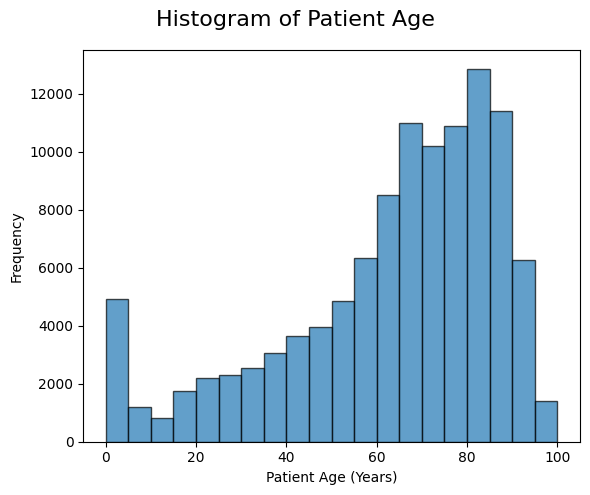

In [ ]:
#age histogram
sepsis['Age'].plot(kind='hist', bins=20, alpha=0.7,
                     figsize=(6, 5), edgecolor='black')

#adjust the layout and appearance
plt.suptitle('Histogram of Patient Age', fontsize=16)
plt.xlabel('Patient Age (Years)')
plt.tight_layout()
plt.show()

The histogram shows that the majority of patients are aged 60 and above, with the highest frequency in the 70–80 years range. There is a noticeable increase in patient count from ages 20 to 70, followed by a decline after 80 years. Younger patients (below 10 years) also form a significant portion, but ages 10–20 have the lowest representation. The distribution is skewed toward older adults.

In [ ]:
#calculate the counts for each dummy category for bar graphs
counts_sex = sepsis['Sex'].value_counts().sort_index()
counts_episode = sepsis['Episode_number'].value_counts().sort_index()
counts_dead = sepsis['Hospital_Outcome'].value_counts().sort_index()

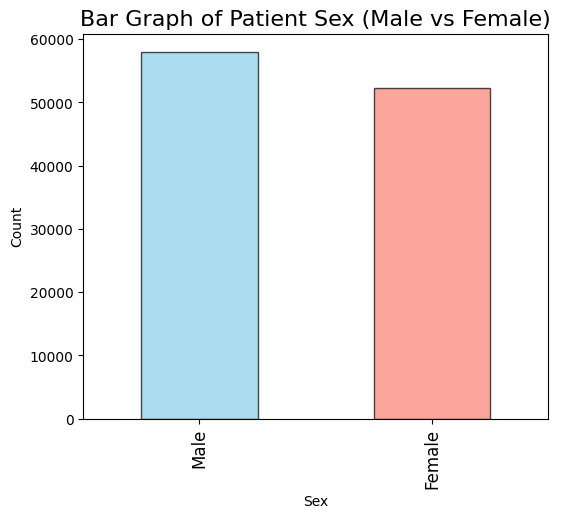

In [ ]:
#gender bar graph
counts_sex.plot(kind='bar', alpha=0.7,figsize=(6, 5),
                color=['skyblue', 'salmon'], edgecolor='black')

#adjust the appearance and add labels
plt.title('Bar Graph of Patient Sex (Male vs Female)', fontsize=16)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0, 1], ['Male', 'Female'], fontsize=12)  # Custom x-ticks for labels
plt.show()

There are more males in the dataset as compared to females.

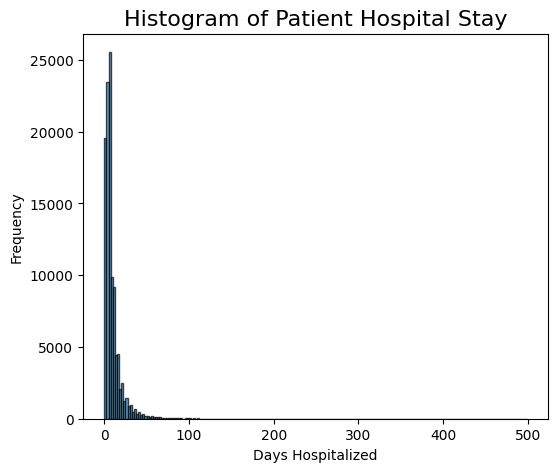

In [ ]:
#hospital stay histogram
sepsis['Length_of_stay'].plot(kind='hist', bins=200, alpha=0.7,
                             figsize=(6, 5), edgecolor='black')

#adjust the appearance and add labels
plt.title('Histogram of Patient Hospital Stay', fontsize=16)
plt.xlabel('Days Hospitalized')
plt.show()

Goes to 500 because there's a patient who had a hospital stay of 499 days. It is heavily skewed to the left.

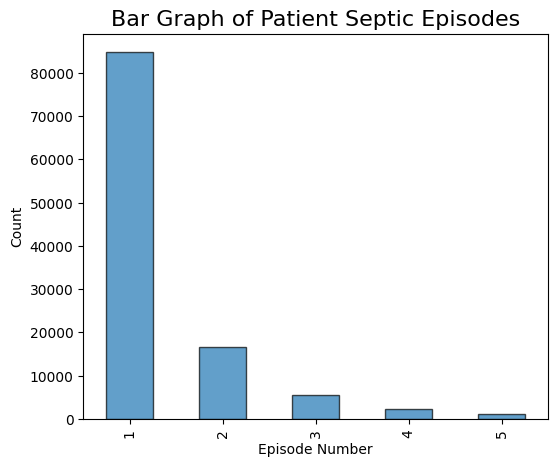

In [ ]:
#septic episode bar graph
counts_episode.plot(kind='bar', alpha=0.7, figsize=(6, 5), edgecolor='black')

#adjust the appearance and add labels
plt.title('Bar Graph of Patient Septic Episodes', fontsize=16)
plt.xlabel('Episode Number')
plt.ylabel('Count')
plt.show()

Majority of the patients have experince just one episode of sepsis.

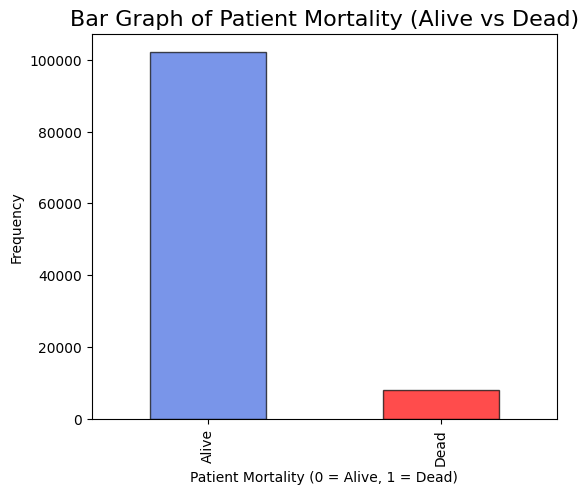

In [ ]:
#mortality bar graph
counts_dead.plot(kind='bar', alpha=0.7, figsize=(6, 5),
                  color=['royalblue', 'red'], edgecolor='black')

#adjust the appearance and add labels
plt.title('Bar Graph of Patient Mortality (Alive vs Dead)', fontsize=16)
plt.xlabel('Patient Mortality (0 = Alive, 1 = Dead)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Alive', 'Dead'])  #custom x-ticks for labels
plt.show()

The Hospital Outcome aas our dependent variable seems ito imbalanced with less than half being classified as deceased.

In [ ]:
#dead count
dead_count = sepsis['Hospital_Outcome'].value_counts()[1]
print('Hospital septic related deaths:', dead_count)

Hospital septic related deaths: 8105


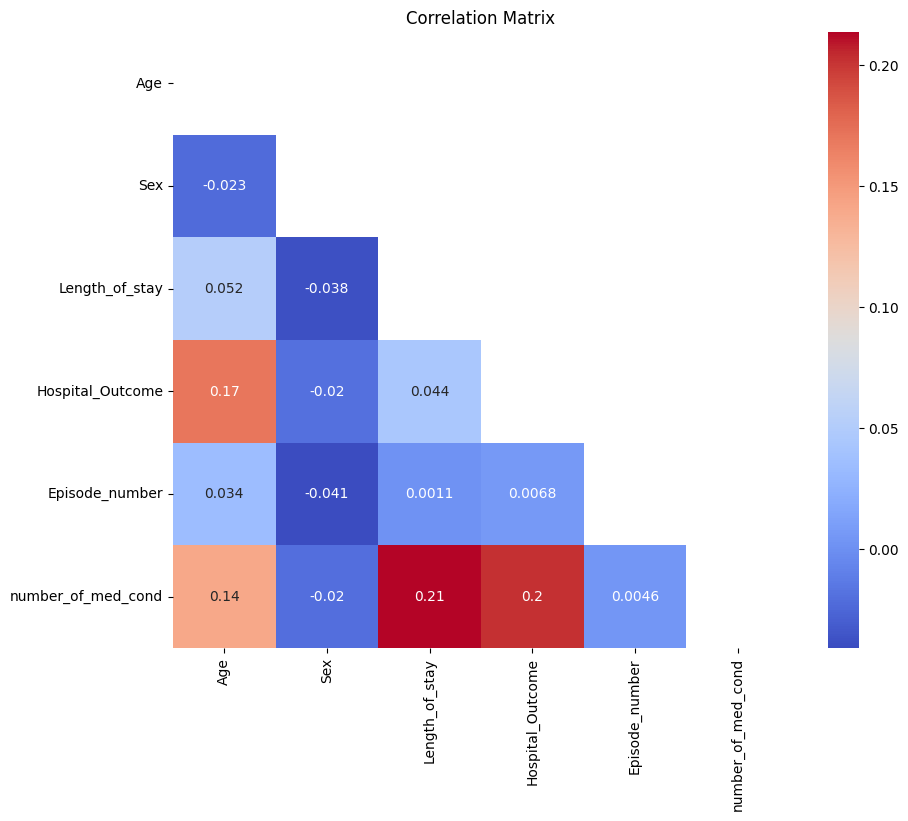

In [ ]:
#correlation matrix
#load matplot and sns to plot heatmap

#plot correlation matrix
corr_matrix_sepsis = sepsis.corr()

plt.figure(figsize = (10, 8))
#hide upper triangle
mask = np.triu(np.ones_like(corr_matrix_sepsis, dtype = bool))
#plot heatmap
sns.heatmap(corr_matrix_sepsis, annot = True, cmap = 'coolwarm', square = True, mask = mask)
plt.title('Correlation Matrix')
plt.show()

There seems to be a correlation between the number of medical conditions and the length of stay, although it is not a strong correlation.

In [ ]:
#sns.pairplot(sepsis, hue = 'Hospital_Outcome')

In [ ]:

contingency_table = pd.crosstab(sepsis['Sex'],
                                sepsis['Hospital_Outcome'],  normalize = True)
print(contingency_table, "\n")

chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'P-value: {p}')

Hospital_Outcome         0         1
Sex                                 
0                 0.484783  0.041269
1                 0.441672  0.032277 

P-value: 1.0


From the chi-square test, the sex variable shows statistical significance in determining hospital outcome.
The male gender are more susceptible to sepsis, and are more like to die from the condition.

# Data Preparation, Processing, and Feature Engineering

### Splitting Dataset into Train and Test sets

Using 80% of data for training 20% for testing with a random seed

In [ ]:
#train test split then standardize

features = sepsis.drop(columns = ['Hospital_Outcome'])
target = sepsis['Hospital_Outcome']

#split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [ ]:
#check shape of train and test set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(88163, 5)
(22041, 5)
(88163,)
(22041,)


checking the alive/dead ratio in the split datasets

In [ ]:
# 0 alive, 1 dead

print("Original Hospital Outcome dead values : {0} ({1:0.2f}%)".format(len(sepsis.loc[sepsis['Hospital_Outcome'] == 1]), (len(sepsis.loc[sepsis['Hospital_Outcome'] == 1])/len(sepsis.index)) * 100))
print("Original Hospital Outcome alive values : {0} ({1:0.2f}%)".format(len(sepsis.loc[sepsis['Hospital_Outcome'] == 0]), (len(sepsis.loc[sepsis['Hospital_Outcome'] == 0])/len(sepsis.index)) * 100))
print("")
print("Training Hospital Outcome dead values : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Hospital Outcome alive values : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Hospital Outcome dead values : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Hospital Outcome alive values : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Hospital Outcome dead values : 8105 (7.35%)
Original Hospital Outcome alive values : 102099 (92.65%)

Training Hospital Outcome dead values : 6492 (7.36%)
Training Hospital Outcome alive values : 81671 (92.64%)

Test Hospital Outcome dead values : 1613 (7.32%)
Test Hospital Outcome alive values : 20428 (92.68%)



From the above, it is evident that there is an imbalance in the dataset, with only **7.35%** of the data representing "dead" cases. This imbalance can significantly affect the model's ability to correctly identify high-risk cases, as it may bias the predictions toward the majority class ("alive"). As a result, metrics like **recall** for the minority class may suffer, which is critical in this scenario. Addressing this imbalance through techniques such as **class weighting**, **oversampling**, or **undersampling** is essential to improve the model's performance on the minority class.

In [ ]:
#standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#check standardized features
print(X_train_scaled[:5], '\n')
print(X_test_scaled[:5])


[[ 0.75937098 -0.94548506  0.37322378 -0.46532866  0.65709214]
 [ 0.42826277  1.05765817  0.05623134 -0.46532866 -0.5740462 ]
 [ 0.4696513  -0.94548506 -0.57775353  0.86772644  1.88823048]
 [ 0.9663136  -0.94548506 -0.57775353  0.86772644 -0.5740462 ]
 [ 0.75937098  1.05765817 -0.3400092   0.86772644 -0.5740462 ]] 

[[-0.64783889  1.05765817  1.08645675 -0.46532866 -0.5740462 ]
 [ 0.05576604  1.05765817 -0.10226487 -0.46532866 -0.5740462 ]
 [-1.59977498  1.05765817  2.4336746  -0.46532866  1.88823048]
 [ 0.59381687 -0.94548506 -0.26076109 -0.46532866  0.65709214]
 [ 0.8007595   1.05765817 -0.10226487 -0.46532866  0.65709214]]


In [ ]:
features.head(1)

,Age,Sex,Length_of_stay,Episode_number,number_of_med_cond
0,21,1,1,1,1


In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = ['Age', 'Sex', 'Length_of_stay',	'Episode_number',	'number_of_med_cond'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns = ['Age',	'Sex', 'Length_of_stay',	'Episode_number',	'number_of_med_cond'])
X_train_scaled.head(1)

,Age,Sex,Length_of_stay,Episode_number,number_of_med_cond
0,0.759371,-0.945485,0.373224,-0.465329,0.657092


# Model Selection and Implementation

What is the Goal?


Sepsis is a critical condition with high mortality rates, particularly in hospitalized patients. Early prediction of survival outcomes in sepsis cases can empower healthcare providers to take proactive steps, such as allocating resources, prioritizing care, and closely monitoring high-risk patients. This model aims to improve patient care by supporting timely decision-making in sepsis management by identifying those at greater risk of death from sepsis. This would help inform decisions such as resource allocations, timely intervention, and enhanced vital monitoring of such patients.


When the model predicts those with chances of not surviving, resources could be allocated to them. Hence Recall is cruical because detecting sepsis early can lead to life-saving interventions


Defining a function for evaluation of the model


In [ ]:
def model_performance(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    accuracy = accuracy_score(target, pred)
    recall = recall_score(target, pred, average='weighted')
    precision = precision_score(target, pred, average='weighted')
    f1 = f1_score(target, pred, average='weighted')

    # creating a dataframe of metrics
    performance = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return performance



def model_performance2(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    accuracy = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)

    # creating a dataframe of metrics
    performance = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return performance


In [ ]:
def con_matrix(model, predictors, y):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    y: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(y, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Classic Logistic Regression

In [ ]:
# Add constant to the predictor variables
x_train_sm = sm.add_constant(X_train_scaled)
x_test_sm = sm.add_constant(X_test_scaled)

# Fit the logistic regression model
logit_model = sm.Logit(y_train.values, x_train_sm)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.231568
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                88163
Model:                          Logit   Df Residuals:                    88157
Method:                           MLE   Df Model:                            5
Date:                Mon, 25 Nov 2024   Pseudo R-squ.:                  0.1193
Time:                        01:12:44   Log-Likelihood:                -20416.
converged:                       True   LL-Null:                       -23182.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.0193      0.020   -153.874      0.000      -3.058      -2.981
Age  

Length of stay and number of medical conditions does not appear to be statistically significant at an alpha of 5%. Is there a possibilities of multi-collinearity?

In [ ]:
# Predict on the test set

y_predict_sm = result.predict(x_test_sm)
y_predict_sm_class = [1 if p > 0.5 else 0 for p in y_predict_sm] #using a threshold of 0.5

# Evaluate the model
cm_sm = confusion_matrix(y_test, y_predict_sm_class, labels=[1,0])
print(cm_sm)

[[   16  1597]
 [   29 20399]]


In [ ]:
print(classification_report(y_test, y_predict_sm_class))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     20428
           1       0.36      0.01      0.02      1613

    accuracy                           0.93     22041
   macro avg       0.64      0.50      0.49     22041
weighted avg       0.89      0.93      0.89     22041



In [ ]:
# Calculate accuracy
y_predict = result.predict(x_train_sm)
y_predict_class = [1 if p > 0.5 else 0 for p in y_predict] #using a threshold of 0.5
accuracy = accuracy_score(y_train, y_predict_class)

# Calculate recall
recall = recall_score(y_train, y_predict_class, average='weighted')

# Calculate precision
precision = precision_score(y_train, y_predict_class, average='weighted')

# Calculate F1 score
f1 = f1_score(y_train, y_predict_class, average='weighted')

lm1_train = performance = pd.DataFrame(
        {
            "Accuracy": [accuracy],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        })
lm1_train

,Accuracy,Recall,Precision,F1
0,0.925876,0.925876,0.889255,0.892833


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_predict_sm_class)

# Calculate recall
recall = recall_score(y_test, y_predict_sm_class,  average='weighted')

# Calculate precision
precision = precision_score(y_test, y_predict_sm_class,  average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_predict_sm_class,  average='weighted')

lm1_test = performance = pd.DataFrame(
        {
            "Accuracy": [accuracy],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        })
lm1_test

,Accuracy,Recall,Precision,F1
0,0.926228,0.926228,0.885548,0.892708



In this senario, falsely prediction someone as alive when they are dead could be alarmly. In medical or life-critical scenarios, improving recall
(predicting "dead" correctly) is essential to ensure that critical conditions are not overlooked.


Refining the model by dropping lenght of stay

In [ ]:
X_train_scaled.head(1)

,Age,Sex,Length_of_stay,Episode_number,number_of_med_cond
0,0.759371,-0.945485,0.373224,-0.465329,0.657092


In [ ]:
# Add constant to the predictor variables
x_train_sm = sm.add_constant(X_train_scaled.drop('Length_of_stay', axis =1))
x_test_sm = sm.add_constant(X_test_scaled.drop('Length_of_stay', axis =1))

# Fit the logistic regression model
logit_model = sm.Logit(y_train.values, x_train_sm)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.231575
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                88163
Model:                          Logit   Df Residuals:                    88158
Method:                           MLE   Df Model:                            4
Date:                Mon, 25 Nov 2024   Pseudo R-squ.:                  0.1193
Time:                        01:12:45   Log-Likelihood:                -20416.
converged:                       True   LL-Null:                       -23182.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.0182      0.020   -154.178      0.000      -3.057      -2.980
Age  

In [ ]:
# Calculate accuracy
y_predict = result.predict(x_train_sm)
y_predict_class = [1 if p > 0.5 else 0 for p in y_predict] #using a threshold of 0.5
accuracy = accuracy_score(y_train, y_predict_class)

# Calculate recall
recall = recall_score(y_train, y_predict_class, average='weighted')

# Calculate precision
precision = precision_score(y_train, y_predict_class, average='weighted')

# Calculate F1 score
f1 = f1_score(y_train, y_predict_class, average='weighted')

lm1_train = performance = pd.DataFrame(
        {
            "Accuracy": [accuracy],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        })
lm1_train

,Accuracy,Recall,Precision,F1
0,0.925899,0.925899,0.889571,0.892866


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_predict_sm_class)

# Calculate recall
recall = recall_score(y_test, y_predict_sm_class,  average='weighted')

# Calculate precision
precision = precision_score(y_test, y_predict_sm_class,  average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_predict_sm_class,  average='weighted')

lm1_test = performance = pd.DataFrame(
        {
            "Accuracy": [accuracy],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        })
lm1_test

,Accuracy,Recall,Precision,F1
0,0.926228,0.926228,0.885548,0.892708


Dealing with the imbalanced data

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model with class_weight='balanced'
logit_model = LogisticRegression(class_weight='balanced', random_state=1)

# Fit the model
logit_model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', random_state=1)

In [ ]:
lm_train_eva = model_performance2(logit_model,X_train_scaled,y_train)
lm_train_eva

,Accuracy,Recall,Precision,F1
0,0.658371,0.73321,0.143603,0.240168


In [ ]:
lm_test_eva = model_performance2(logit_model,X_test_scaled,y_test)
lm_test_eva

,Accuracy,Recall,Precision,F1
0,0.657502,0.729076,0.141892,0.237552


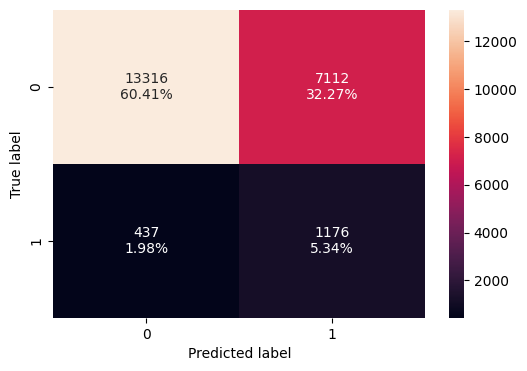

In [ ]:
#confusion matrix
con_matrix(model = logit_model, predictors = X_test_scaled, y = y_test)

In [ ]:
pred = logit_model.predict(X_test_scaled)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.65      0.78     20428
           1       0.14      0.73      0.24      1613

    accuracy                           0.66     22041
   macro avg       0.56      0.69      0.51     22041
weighted avg       0.91      0.66      0.74     22041



## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 1)

dtree.fit(X_train_scaled, y_train)



DecisionTreeClassifier(max_depth=3, random_state=1)

Evaluating Decision Tree

In [ ]:
dt1_train_eva = model_performance(dtree,X_train_scaled,y_train)
dt1_train_eva

,Accuracy,Recall,Precision,F1
0,0.927328,0.927328,0.903569,0.897971


In [ ]:
dt1_test_eva = model_performance(dtree,X_test_scaled,y_test)
dt1_test_eva

,Accuracy,Recall,Precision,F1
0,0.928542,0.928542,0.908368,0.900128


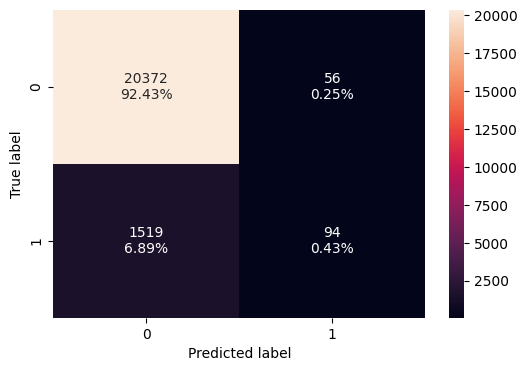

In [ ]:
con_matrix(model = dtree, predictors = X_test_scaled, y = y_test)

In [ ]:
pred = dtree.predict(X_test_scaled)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     20428
           1       0.63      0.06      0.11      1613

    accuracy                           0.93     22041
   macro avg       0.78      0.53      0.53     22041
weighted avg       0.91      0.93      0.90     22041



### Decision Tree with weighted class

In [ ]:
dtree2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 1, class_weight='balanced')

dtree2.fit(X_train_scaled, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=1)

Evaluating Decision Tree with weighted class

In [ ]:
dt2_train_eva = model_performance2(dtree2,X_train_scaled,y_train)
dt2_train_eva

,Accuracy,Recall,Precision,F1
0,0.60353,0.792052,0.13271,0.227331


In [ ]:
dt2_test_eva = model_performance2(dtree2,X_test_scaled,y_test)
dt2_test_eva

,Accuracy,Recall,Precision,F1
0,0.601289,0.792932,0.131409,0.225454


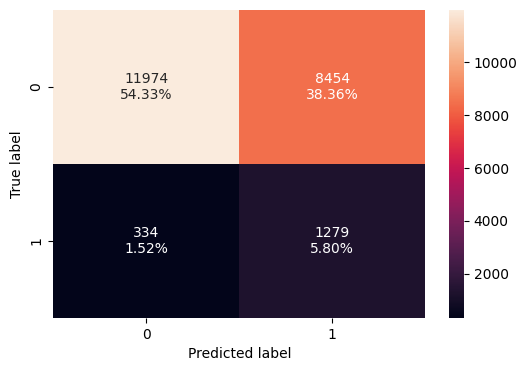

In [ ]:
con_matrix(model = dtree2, predictors = X_test_scaled, y = y_test)

In [ ]:
pred = dtree2.predict(X_test_scaled)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.59      0.73     20428
           1       0.13      0.79      0.23      1613

    accuracy                           0.60     22041
   macro avg       0.55      0.69      0.48     22041
weighted avg       0.91      0.60      0.69     22041



### Tuning Decision Tree

In [ ]:
#Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(random_state=1) #class_weight='balanced'

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,10),
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)
from sklearn.model_selection import GridSearchCV

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_scaled, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, min_samples_leaf=5,
                       random_state=1)

In [ ]:
dt3_train_eva = model_performance(dtree_estimator,X_train_scaled,y_train)
dt3_train_eva

,Accuracy,Recall,Precision,F1
0,0.927328,0.927328,0.903569,0.897971


In [ ]:
dt3_test_eva = model_performance(dtree_estimator,X_test_scaled,y_test)
dt3_test_eva

,Accuracy,Recall,Precision,F1
0,0.928542,0.928542,0.908368,0.900128


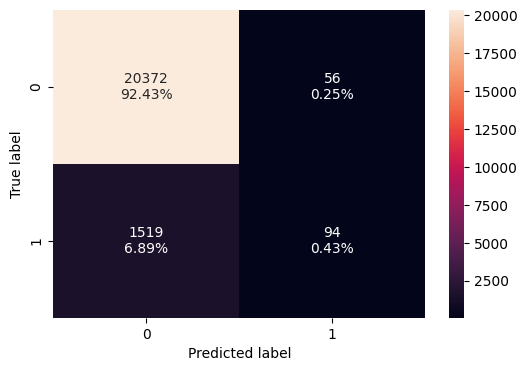

In [ ]:
con_matrix(model = dtree_estimator, predictors = X_test_scaled, y = y_test)

In [ ]:
pred = dtree_estimator.predict(X_test_scaled)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     20428
           1       0.63      0.06      0.11      1613

    accuracy                           0.93     22041
   macro avg       0.78      0.53      0.53     22041
weighted avg       0.91      0.93      0.90     22041



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 1)

rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=1)

Evaluating Random Forest

In [ ]:
rf1_train_eva = model_performance(rf,X_train_scaled,y_train)
rf1_train_eva

,Accuracy,Recall,Precision,F1
0,0.949582,0.949582,0.946525,0.939706


In [ ]:
rf1_test_eva = model_performance(rf,X_test_scaled,y_test)
rf1_test_eva

,Accuracy,Recall,Precision,F1
0,0.918243,0.918243,0.887639,0.898277


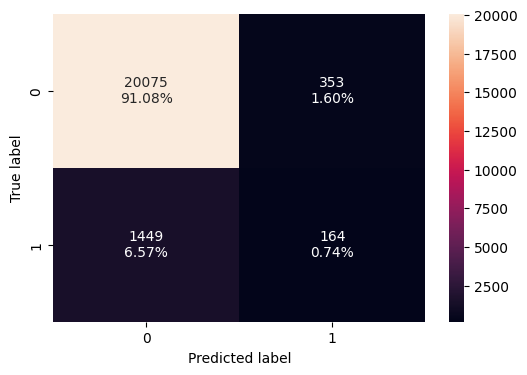

In [ ]:
con_matrix(model = rf, predictors = X_test_scaled, y = y_test)

### Random Forest with weighted class

In [ ]:

rf2 = RandomForestClassifier(random_state = 1, class_weight = 'balanced')

rf2.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [ ]:
rf2_train_eva = model_performance(rf2,X_train_scaled,y_train)
rf2_train_eva

,Accuracy,Recall,Precision,F1
0,0.870558,0.870558,0.936752,0.893398


In [ ]:
rf2_test_eva = model_performance(rf2,X_test_scaled,y_test)
rf2_test_eva

,Accuracy,Recall,Precision,F1
0,0.817295,0.817295,0.881153,0.845495


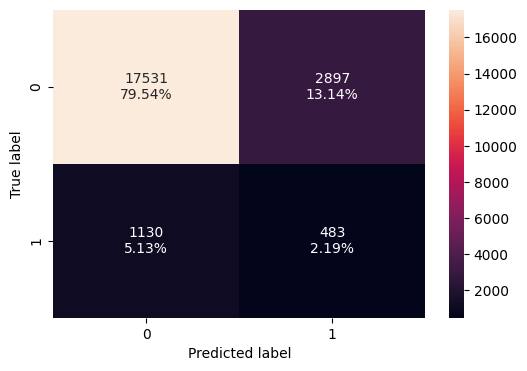

In [ ]:
con_matrix(model = rf2, predictors = X_test_scaled, y = y_test)

### Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier # Importing BaggingClassifier from sklearn.ensemble
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train_scaled,y_train)

BaggingClassifier(random_state=1)

In [ ]:
bc1_train_eva = model_performance(bagging_classifier,X_train_scaled,y_train)
bc1_train_eva

,Accuracy,Recall,Precision,F1
0,0.946213,0.946213,0.940762,0.935761


In [ ]:
bc1_test_eva = model_performance(bagging_classifier,X_test_scaled,y_test)
bc1_test_eva

,Accuracy,Recall,Precision,F1
0,0.915839,0.915839,0.885871,0.897109


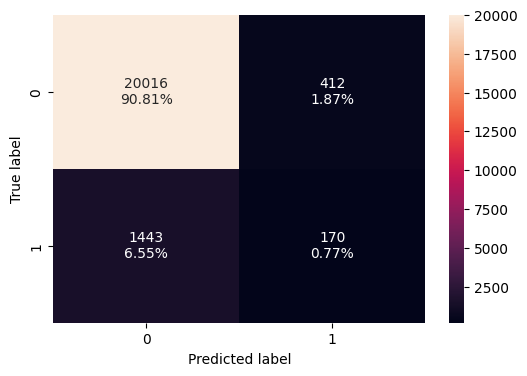

In [ ]:
con_matrix(model = bagging_classifier, predictors = X_test_scaled, y = y_test)

### Tuning Bagging Classifer

In [ ]:
bagging_estimator = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1],
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40, 50]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_scaled, y_train)

# Set the clf to the best combination of parameters
bagging_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator.fit(X_train_scaled, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=30,
                  random_state=1)

In [ ]:
bc2_train_eva = model_performance(bagging_estimator,X_train_scaled,y_train)
bc2_train_eva

,Accuracy,Recall,Precision,F1
0,0.937638,0.937638,0.938933,0.91638


In [ ]:
bc2_test_eva = model_performance(bagging_estimator,X_test_scaled,y_test)
bc2_test_eva

,Accuracy,Recall,Precision,F1
0,0.927181,0.927181,0.900618,0.899244


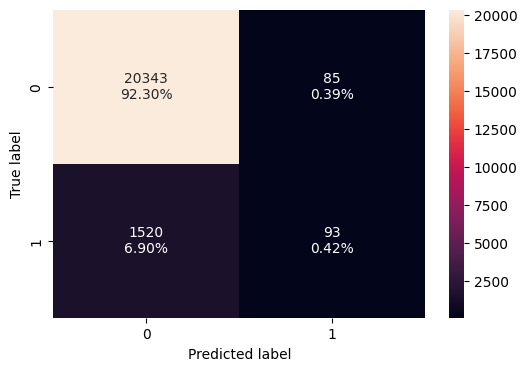

In [ ]:
con_matrix(model = bagging_estimator, predictors = X_test_scaled, y = y_test)

### Neural Network
Using Tensorflow

In [ ]:
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [ ]:
model = Sequential()
model.add(Dense(256, activation='tanh', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.2)) #avoid overfitting
model.add(Dense(128, activation='tanh',))
model.add(Dropout(0.2)) #avoid overfitting
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.1)) #avoid overfitting
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
class_weights_dict

{0: 0.5397448298661703, 1: 6.7901263093037585}

In [ ]:

model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) , metrics=['accuracy', 'Recall', 'Precision'])
#changed optimizer from Adams to Adams with learning rate

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,801 (175.00 KB)

 Trainable params: 44,801 (175.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train_scaled,
                      y_train.values,
                      validation_split=0.2,
                      class_weight=class_weights_dict,
                      epochs=100,
                      batch_size=32,
                      verbose=2)

Epoch 1/100
2205/2205 - 10s - 5ms/step - Precision: 0.1352 - Recall: 0.7359 - accuracy: 0.6312 - loss: 0.5879 - val_Precision: 0.1528 - val_Recall: 0.6846 - val_accuracy: 0.7057 - val_loss: 0.5301
Epoch 2/100
2205/2205 - 6s - 3ms/step - Precision: 0.1399 - Recall: 0.7470 - accuracy: 0.6407 - loss: 0.5768 - val_Precision: 0.1460 - val_Recall: 0.7258 - val_accuracy: 0.6765 - val_loss: 0.5421
Epoch 3/100
2205/2205 - 11s - 5ms/step - Precision: 0.1429 - Recall: 0.7379 - accuracy: 0.6525 - loss: 0.5716 - val_Precision: 0.1352 - val_Recall: 0.7662 - val_accuracy: 0.6324 - val_loss: 0.5912
Epoch 4/100
2205/2205 - 6s - 3ms/step - Precision: 0.1440 - Recall: 0.7426 - accuracy: 0.6535 - loss: 0.5671 - val_Precision: 0.1371 - val_Recall: 0.7876 - val_accuracy: 0.6300 - val_loss: 0.5761
Epoch 5/100
2205/2205 - 10s - 4ms/step - Precision: 0.1450 - Recall: 0.7493 - accuracy: 0.6539 - loss: 0.5651 - val_Precision: 0.1446 - val_Recall: 0.7488 - val_accuracy: 0.6649 - val_loss: 0.5500
Epoch 6/100
2205/

In [ ]:
# Calculate accuracy
y_pred = model.predict(X_train_scaled)
y_pred = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_train, y_pred)

# Calculate recall
recall = recall_score(y_train, y_pred, average='weighted')

# Calculate precision
precision = precision_score(y_train, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_train, y_pred, average='weighted')

nn_train = performance = pd.DataFrame(
        {
            "Accuracy": [accuracy],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        })
nn_train

2756/2756 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step


,Accuracy,Recall,Precision,F1
0,0.645826,0.645826,0.912224,0.730092


In [ ]:
# Calculate accuracy
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

nn_test = performance = pd.DataFrame(
        {
            "Accuracy": [accuracy],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        })

nn_test


689/689 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


,Accuracy,Recall,Precision,F1
0,0.642122,0.642122,0.91181,0.727458


### Comparing all Models

In [ ]:
models_train_comp_df = pd.concat(
    [lm1_train.T, lm_train_eva.T, dt1_train_eva.T, dt2_train_eva.T, dt3_train_eva.T, rf1_train_eva.T,
     rf2_train_eva.T, bc1_train_eva.T, bc2_train_eva.T, nn_train.T], axis=1
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression - weighted class",
    "Decision Tree",
    "Decision Tree - weighted class",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest - weighted class",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Neural Networks"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression,Logistic Regression - weighted class,Decision Tree,Decision Tree - weighted class,Decision Tree Tuned,Random Forest,Random Forest - weighted class,Bagging Classifier,Bagging Estimator Tuned,Neural Networks
Accuracy,0.925899,0.658371,0.927328,0.603530,0.927328,0.949582,0.870558,0.946213,0.937638,0.645826
Recall,0.925899,0.733210,0.927328,0.792052,0.927328,0.949582,0.870558,0.946213,0.937638,0.645826
Precision,0.889571,0.143603,0.903569,0.132710,0.903569,0.946525,0.936752,0.940762,0.938933,0.912224
F1,0.892866,0.240168,0.897971,0.227331,0.897971,0.939706,0.893398,0.935761,0.916380,0.730092


In [ ]:
models_test_comp_df = pd.concat(
    [lm1_test.T, lm_test_eva.T, dt1_test_eva.T, dt2_test_eva.T, dt3_test_eva.T, rf1_test_eva.T,
     rf2_test_eva.T, bc1_test_eva.T, bc2_test_eva.T, nn_test.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression - weighted class",
    "Decision Tree",
    "Decision Tree - weighted class",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest - weighted class",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Neural Networks"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Logistic Regression,Logistic Regression - weighted class,Decision Tree,Decision Tree - weighted class,Decision Tree Tuned,Random Forest,Random Forest - weighted class,Bagging Classifier,Bagging Estimator Tuned,Neural Networks
Accuracy,0.926228,0.657502,0.928542,0.601289,0.928542,0.918243,0.817295,0.915839,0.927181,0.642122
Recall,0.926228,0.729076,0.928542,0.792932,0.928542,0.918243,0.817295,0.915839,0.927181,0.642122
Precision,0.885548,0.141892,0.908368,0.131409,0.908368,0.887639,0.881153,0.885871,0.900618,0.911810
F1,0.892708,0.237552,0.900128,0.225454,0.900128,0.898277,0.845495,0.897109,0.899244,0.727458


The Bagging Estimator Tuned model is the best overall, as it achieves the highest metrics on both training and testing datasets while demonstrating minimal overfitting (its training and testing metrics are closely aligned). Since recall is a critical metric for this prediction model, the Bagging Estimator Tuned model's superior recall performance further solidifies its suitability.


### Future works to improve the model

A. Modeling
1. Adjust for class imbalance
   - SMOTE
   - ADASYN
   - Undersampling Methodologies

B. Model Improvement
1. use other classification algorithms such as Support Vector Machines and Gradient Boosting
2. Further Tuning of hyperparameters

C. Feature Engineering
1. Investigating new or derived features that may better capture patterns within the data, such as interaction terms or medical history features.

D. Model Evaluation:
1. Extending evaluation metrics beyond accuracy, recall, and precision to include AUC-ROC (Area Under the Receiver Operating Characteristic Curve) and PR AUC (Precision-Recall AUC), which can provide a more balanced view of model performance in imbalanced settings.
2. Implementing cross-validation to ensure robustness of the models across different subsets of data and prevent overfitting.




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Healthcare Final Project
{'bagging_classifier': BaggingClassifier(random_state=1), 'tuned_bagging_classifer': BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=30,
                  random_state=1)}


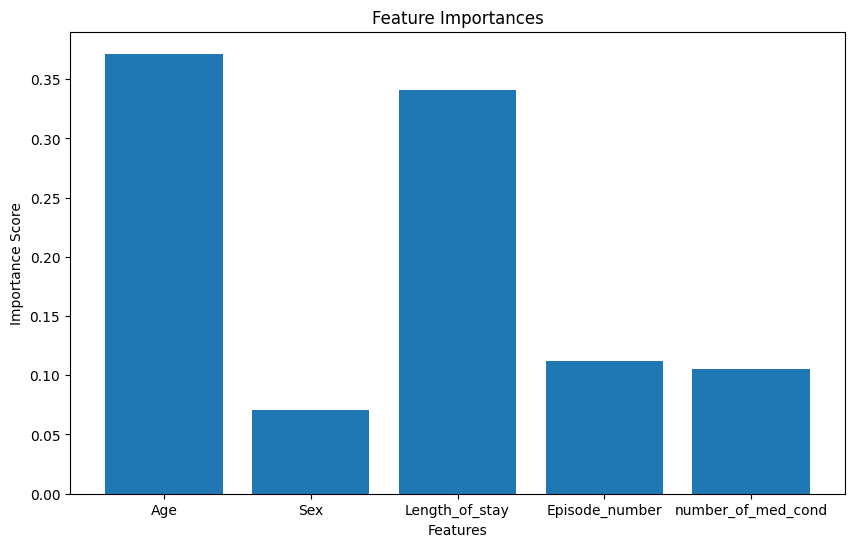

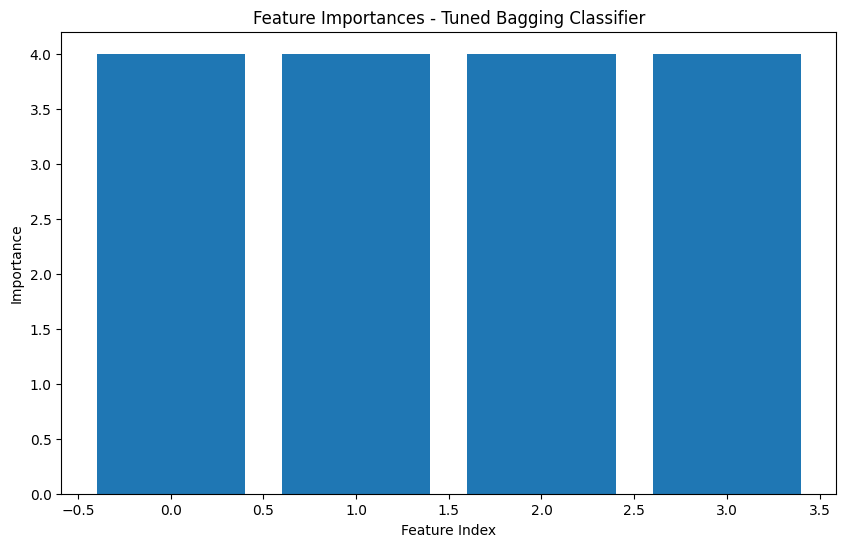

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, make_scorer
from sklearn.ensemble import BaggingClassifier

from google.colab import drive
drive.mount("/content/drive")
%cd '/content/drive/Shareddrives/USC - PROJECTS/Healthcare Analytics/Healthcare Final Project'

def get_dataset() -> pd.DataFrame:
    sepsis = pd.read_excel('S1 Dataset.xlsx')
    sepsis = sepsis.rename( columns = {
    'Age (years)' : 'Age',
    'Sex (0 male, 1 female)' : 'Sex',
    'Length of stay (days)' : 'Length_of_stay',
    'Hospital outcome (0 alive, 1 dead)' : 'Hospital_Outcome',
    'Episode number' : 'Episode_number'})
    icd10_cols = ['ICD-10 1', 'ICD-10 2', 'ICD-10 3', 'ICD-10 4', 'ICD-10 5',
     'ICD-10 6', 'ICD-10 7', 'ICD-10 8', 'ICD-10 9']

    #coverting the international code columns as binary if there is an underlying medical conditions and quantifying them

    for col in icd10_cols:
        sepsis[col] = sepsis[col].apply(lambda code: 1 if pd.notna(code) and code != ' ' and code != '' else 0)

    sepsis['number_of_med_cond'] = sepsis[icd10_cols].sum(axis=1)

    sepsis = sepsis.drop(icd10_cols, axis = 1)

    return sepsis

def split_and_scale(sepsis:pd.DataFrame) -> tuple:
    features = sepsis.drop(columns = ['Hospital_Outcome'])
    target = sepsis['Hospital_Outcome']

    #split into 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size = 0.2,
                                                    random_state = 42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns = ['Age', 'Sex', 'Length_of_stay',	'Episode_number',	'number_of_med_cond'])
    X_test_scaled = pd.DataFrame(X_test_scaled, columns = ['Age',	'Sex', 'Length_of_stay',	'Episode_number',	'number_of_med_cond'])

    return X_train_scaled, X_test_scaled, y_train, y_test

def make_models(x: pd.DataFrame, y:pd.DataFrame) -> dict:
    bagging_classifier = BaggingClassifier(random_state=1)
    bagging_classifier.fit(x,y)

    # this max features param is kinda tricky because I cant confirm what .8 variables are being used
    tuned_bagging_classifier = BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=30, random_state=1)
    tuned_bagging_classifier.fit(x,y)
    return {"bagging_classifier":bagging_classifier,
            "tuned_bagging_classifer": tuned_bagging_classifier}

def make_feature_importance_plots(models:dict) -> None:
    print(models)
    if any("bagging_classifier" in key for key in models):
        feature_importances = np.mean(
            [tree.feature_importances_ for tree in models["bagging_classifier"].estimators_],
            axis=0
        )

        plt.figure(figsize=(10, 6))
        plt.bar(['Age', 'Sex', 'Length_of_stay', 'Episode_number', 'number_of_med_cond'],
                feature_importances, align="center")
        plt.xlabel("Features")
        plt.ylabel("Importance Score")
        plt.title("Feature Importances")

        plt.show
    if any("tuned_bagging_classifer" in key for key in models):
        feature_importances = np.mean(
            [tree.feature_importances_ for tree in models["tuned_bagging_classifer"].estimators_],
            axis=0
        )
        plt.figure(figsize=(10, 6))
        # .8 * 5 = 4 -> first 4 vars? randomization?
        plt.bar(range(4), 4, align="center") # cant say for sure which vars are being used. punt to next sprint
        plt.xlabel("Feature Index")
        plt.ylabel("Importance")
        plt.title("Feature Importances - Tuned Bagging Classifier")

        plt.show()


def main():
    sepsis = get_dataset()
    X_train_scaled, X_test_scaled, y_train, y_test = split_and_scale(sepsis)
    models = make_models(X_train_scaled, y_train)
    make_feature_importance_plots(models)



if __name__ == "__main__":
    main()